In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve, auc, precision_score, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
df = pd.read_csv('Dementia.csv')

In [3]:
df

,ID,age,gender,dementia,dementia_all,educationyears,EF,PS,Global,diabetes,...,hypercholesterolemia,lacunes_num,fazekas_cat,study,study1,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,1,52.67,male,0.0,0,11.0,-2.403333,-1.290000,-1.287000,0,...,Yes,more-than-zero,2.5,scans,scans,3.0,7.0,3,5.0,1
1,10,64.58,male,0.0,0,10.0,1.280000,0.360000,0.744000,0,...,Yes,more-than-zero,0.5,scans,scans,2.0,3.0,1,1.5,1
2,100,74.92,male,0.0,0,8.0,-1.440000,-1.520000,-0.922000,0,...,Yes,more-than-zero,0.5,scans,scans,1.0,2.0,1,1.5,0
3,101,74.83,male,1.0,1,9.0,NaN,-2.136271,-1.301102,0,...,Yes,more-than-zero,2.5,scans,scans,2.0,4.0,2,4.0,0
4,102,79.25,male,0.0,0,10.0,-0.920000,-1.493333,-0.924000,0,...,Yes,more-than-zero,2.5,scans,scans,2.0,3.0,2,1.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,989,67.00,female,0.0,0,13.0,-0.100000,-0.020000,-0.260000,0,...,Yes,zero,0.5,ASPS-elderly,ASPS,NaN,NaN,0,0.0,0
1838,990,71.00,female,0.0,0,13.0,-0.370000,-1.060000,-1.003333,0,...,Yes,zero,0.5,ASPS-elderly,ASPS,NaN,NaN,1,0.0,0
1839,991,55.00,male,0.0,0,10.0,0.460000,0.960000,0.610000,0,...,Yes,zero,0.5,ASPS-elderly,ASPS,0.0,0.0,0,0.0,0
1840,995,54.00,male,0.0,0,10.0,0.190000,0.030000,0.590000,0,...,Yes,zero,0.5,ASPS-elderly,ASPS,0.0,0.0,1,0.0,0


In [4]:
df.drop(columns = ['dementia','educationyears'], inplace = True)

In [5]:
df

,ID,age,gender,dementia_all,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,lacunes_num,fazekas_cat,study,study1,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,1,52.67,male,0,-2.403333,-1.290000,-1.287000,0,current-smoker,Yes,Yes,more-than-zero,2.5,scans,scans,3.0,7.0,3,5.0,1
1,10,64.58,male,0,1.280000,0.360000,0.744000,0,ex-smoker,Yes,Yes,more-than-zero,0.5,scans,scans,2.0,3.0,1,1.5,1
2,100,74.92,male,0,-1.440000,-1.520000,-0.922000,0,never-smoker,Yes,Yes,more-than-zero,0.5,scans,scans,1.0,2.0,1,1.5,0
3,101,74.83,male,1,NaN,-2.136271,-1.301102,0,current-smoker,Yes,Yes,more-than-zero,2.5,scans,scans,2.0,4.0,2,4.0,0
4,102,79.25,male,0,-0.920000,-1.493333,-0.924000,0,ex-smoker,Yes,Yes,more-than-zero,2.5,scans,scans,2.0,3.0,2,1.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,989,67.00,female,0,-0.100000,-0.020000,-0.260000,0,never-smoker,Yes,Yes,zero,0.5,ASPS-elderly,ASPS,NaN,NaN,0,0.0,0
1838,990,71.00,female,0,-0.370000,-1.060000,-1.003333,0,never-smoker,Yes,Yes,zero,0.5,ASPS-elderly,ASPS,NaN,NaN,1,0.0,0
1839,991,55.00,male,0,0.460000,0.960000,0.610000,0,ex-smoker,No,Yes,zero,0.5,ASPS-elderly,ASPS,0.0,0.0,0,0.0,0
1840,995,54.00,male,0,0.190000,0.030000,0.590000,0,ex-smoker,No,Yes,zero,0.5,ASPS-elderly,ASPS,0.0,0.0,1,0.0,0


In [6]:
df.describe()

,ID,age,dementia_all,EF,PS,Global,diabetes,fazekas_cat,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
count,1842.000000,1842.000000,1842.000000,1634.000000,1574.000000,1534.000000,1842.000000,1842.000000,1165.000000,1165.000000,1842.000000,1842.000000,1842.000000
mean,29897.929967,65.952588,0.062975,-0.063088,-0.066649,-0.026860,0.122693,1.125407,0.719313,1.491845,1.311075,0.417481,0.105320
std,67056.874773,8.923488,0.242984,0.785264,0.871836,0.677071,0.328173,0.927441,0.932063,1.623277,0.799495,1.088171,0.307049
min,1.000000,38.000000,0.000000,-5.200000,-2.680000,-2.420000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,60.000000,0.000000,-0.436896,-0.670805,-0.476881,0.000000,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,612.500000,66.151393,0.000000,0.130000,-0.020000,0.006667,0.000000,0.500000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,1713.250000,73.000000,0.000000,0.484327,0.550000,0.423333,0.000000,2.500000,1.000000,2.000000,2.000000,0.000000,0.000000
max,211301.000000,90.000000,1.000000,2.350000,2.730000,1.853333,1.000000,2.500000,3.000000,7.000000,3.000000,5.000000,1.000000


In [7]:
df['age'] = df['age'].astype(int)

In [8]:
df

,ID,age,gender,dementia_all,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,lacunes_num,fazekas_cat,study,study1,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,1,52,male,0,-2.403333,-1.290000,-1.287000,0,current-smoker,Yes,Yes,more-than-zero,2.5,scans,scans,3.0,7.0,3,5.0,1
1,10,64,male,0,1.280000,0.360000,0.744000,0,ex-smoker,Yes,Yes,more-than-zero,0.5,scans,scans,2.0,3.0,1,1.5,1
2,100,74,male,0,-1.440000,-1.520000,-0.922000,0,never-smoker,Yes,Yes,more-than-zero,0.5,scans,scans,1.0,2.0,1,1.5,0
3,101,74,male,1,NaN,-2.136271,-1.301102,0,current-smoker,Yes,Yes,more-than-zero,2.5,scans,scans,2.0,4.0,2,4.0,0
4,102,79,male,0,-0.920000,-1.493333,-0.924000,0,ex-smoker,Yes,Yes,more-than-zero,2.5,scans,scans,2.0,3.0,2,1.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,989,67,female,0,-0.100000,-0.020000,-0.260000,0,never-smoker,Yes,Yes,zero,0.5,ASPS-elderly,ASPS,NaN,NaN,0,0.0,0
1838,990,71,female,0,-0.370000,-1.060000,-1.003333,0,never-smoker,Yes,Yes,zero,0.5,ASPS-elderly,ASPS,NaN,NaN,1,0.0,0
1839,991,55,male,0,0.460000,0.960000,0.610000,0,ex-smoker,No,Yes,zero,0.5,ASPS-elderly,ASPS,0.0,0.0,0,0.0,0
1840,995,54,male,0,0.190000,0.030000,0.590000,0,ex-smoker,No,Yes,zero,0.5,ASPS-elderly,ASPS,0.0,0.0,1,0.0,0


In [9]:
df.rename(columns = {'dementia_all':'dementia'}, inplace = True)

In [10]:
df

,ID,age,gender,dementia,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,lacunes_num,fazekas_cat,study,study1,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,1,52,male,0,-2.403333,-1.290000,-1.287000,0,current-smoker,Yes,Yes,more-than-zero,2.5,scans,scans,3.0,7.0,3,5.0,1
1,10,64,male,0,1.280000,0.360000,0.744000,0,ex-smoker,Yes,Yes,more-than-zero,0.5,scans,scans,2.0,3.0,1,1.5,1
2,100,74,male,0,-1.440000,-1.520000,-0.922000,0,never-smoker,Yes,Yes,more-than-zero,0.5,scans,scans,1.0,2.0,1,1.5,0
3,101,74,male,1,NaN,-2.136271,-1.301102,0,current-smoker,Yes,Yes,more-than-zero,2.5,scans,scans,2.0,4.0,2,4.0,0
4,102,79,male,0,-0.920000,-1.493333,-0.924000,0,ex-smoker,Yes,Yes,more-than-zero,2.5,scans,scans,2.0,3.0,2,1.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,989,67,female,0,-0.100000,-0.020000,-0.260000,0,never-smoker,Yes,Yes,zero,0.5,ASPS-elderly,ASPS,NaN,NaN,0,0.0,0
1838,990,71,female,0,-0.370000,-1.060000,-1.003333,0,never-smoker,Yes,Yes,zero,0.5,ASPS-elderly,ASPS,NaN,NaN,1,0.0,0
1839,991,55,male,0,0.460000,0.960000,0.610000,0,ex-smoker,No,Yes,zero,0.5,ASPS-elderly,ASPS,0.0,0.0,0,0.0,0
1840,995,54,male,0,0.190000,0.030000,0.590000,0,ex-smoker,No,Yes,zero,0.5,ASPS-elderly,ASPS,0.0,0.0,1,0.0,0


In [11]:
df['fazekas_cat'].unique()

array([2.5, 0.5])

In [12]:
df

,ID,age,gender,dementia,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,lacunes_num,fazekas_cat,study,study1,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,1,52,male,0,-2.403333,-1.290000,-1.287000,0,current-smoker,Yes,Yes,more-than-zero,2.5,scans,scans,3.0,7.0,3,5.0,1
1,10,64,male,0,1.280000,0.360000,0.744000,0,ex-smoker,Yes,Yes,more-than-zero,0.5,scans,scans,2.0,3.0,1,1.5,1
2,100,74,male,0,-1.440000,-1.520000,-0.922000,0,never-smoker,Yes,Yes,more-than-zero,0.5,scans,scans,1.0,2.0,1,1.5,0
3,101,74,male,1,NaN,-2.136271,-1.301102,0,current-smoker,Yes,Yes,more-than-zero,2.5,scans,scans,2.0,4.0,2,4.0,0
4,102,79,male,0,-0.920000,-1.493333,-0.924000,0,ex-smoker,Yes,Yes,more-than-zero,2.5,scans,scans,2.0,3.0,2,1.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,989,67,female,0,-0.100000,-0.020000,-0.260000,0,never-smoker,Yes,Yes,zero,0.5,ASPS-elderly,ASPS,NaN,NaN,0,0.0,0
1838,990,71,female,0,-0.370000,-1.060000,-1.003333,0,never-smoker,Yes,Yes,zero,0.5,ASPS-elderly,ASPS,NaN,NaN,1,0.0,0
1839,991,55,male,0,0.460000,0.960000,0.610000,0,ex-smoker,No,Yes,zero,0.5,ASPS-elderly,ASPS,0.0,0.0,0,0.0,0
1840,995,54,male,0,0.190000,0.030000,0.590000,0,ex-smoker,No,Yes,zero,0.5,ASPS-elderly,ASPS,0.0,0.0,1,0.0,0


In [13]:
df.isnull().sum()

ID                        0
age                       0
gender                    0
dementia                  0
EF                      208
PS                      268
Global                  308
diabetes                  0
smoking                  11
hypertension              0
hypercholesterolemia      0
lacunes_num               0
fazekas_cat               0
study                     0
study1                    0
SVD Simple Score        677
SVD Amended Score       677
Fazekas                   0
lac_count                 0
CMB_count                 0
dtype: int64

In [14]:
EF_mean = df['EF'].mean()
df['EF'].fillna(EF_mean, inplace = True)

In [15]:
PS_mean = df['PS'].mean()
df['PS'].fillna(PS_mean, inplace = True)

In [16]:
Global_mean = df['Global'].mean()
df['Global'].fillna(Global_mean, inplace = True)

In [17]:
smoking_fill = df['smoking'].fillna('Unknown',inplace = True)
smoking_fill

In [18]:
Simple_mean = df['SVD Simple Score'].mean()
df['SVD Simple Score'].fillna(Simple_mean, inplace = True)

In [19]:
Amended_mean = df['SVD Amended Score'].mean()
df['SVD Amended Score'].fillna(Amended_mean, inplace = True)

In [20]:
df.isnull().sum()

ID                      0
age                     0
gender                  0
dementia                0
EF                      0
PS                      0
Global                  0
diabetes                0
smoking                 0
hypertension            0
hypercholesterolemia    0
lacunes_num             0
fazekas_cat             0
study                   0
study1                  0
SVD Simple Score        0
SVD Amended Score       0
Fazekas                 0
lac_count               0
CMB_count               0
dtype: int64

In [21]:
df.columns

Index(['ID', 'age', 'gender', 'dementia', 'EF', 'PS', 'Global', 'diabetes',
       'smoking', 'hypertension', 'hypercholesterolemia', 'lacunes_num',
       'fazekas_cat', 'study', 'study1', 'SVD Simple Score',
       'SVD Amended Score', 'Fazekas', 'lac_count', 'CMB_count'],
      dtype='object')

In [22]:
from scipy import stats
skew = stats.skew(df.describe())
print('Skewness', skew)

Skewness [1.86461525 2.26094135 2.26778559 2.26773667 2.26776278 2.26777168
 2.26778558 2.2677793  2.26777747 2.26773903 2.26777842 2.26775581
 2.26778558]


In [23]:
log_transform = np.log(skew)
print('Log-Transform', log_transform)

Log-Transform [0.62305473 0.81578125 0.81880384 0.81878227 0.81879379 0.81879771
 0.81880384 0.81880107 0.81880026 0.81878331 0.81880068 0.81879071
 0.81880384]


In [24]:
Q3=np.percentile(df.describe(),75)
Q1=np.percentile(df.describe(),25)
Q2=np.percentile(df.describe(),50)


IQR=Q3-Q1
print('Q2:',Q2)
print('Q3:',Q3)
print('Q1:',Q1)
print('IQR:',IQR)

Q2: 0.8666623158074784
Q3: 7.479799749645628
Q1: 0.0
IQR: 7.479799749645628


In [25]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [26]:
upper_array = np.where(df.describe() >= upper)[0]
lower_array = np.where(df.describe() <= lower)[0]
 

df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

print("New Shape: ", df.shape)

New Shape:  (1834, 20)


In [27]:
df

,ID,age,gender,dementia,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,lacunes_num,fazekas_cat,study,study1,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
8,107,53,male,1,-3.086667,-2.616667,-2.178000,0,never-smoker,Yes,Yes,more-than-zero,2.5,scans,scans,3.000000,7.000000,3,5.0,1
9,108,80,female,0,-0.060000,-0.100000,0.043000,0,never-smoker,No,Yes,zero,2.5,scans,scans,2.000000,4.000000,3,0.0,1
10,109,72,female,0,0.993333,0.476667,0.840000,0,ex-smoker,Yes,Yes,more-than-zero,0.5,scans,scans,1.000000,2.000000,1,1.5,0
11,110,67,male,1,-2.503333,-2.665000,-2.313750,1,never-smoker,Yes,Yes,more-than-zero,2.5,scans,scans,3.000000,7.000000,3,5.0,1
12,111,51,male,0,-1.603333,-1.630000,-1.395000,0,ex-smoker,Yes,Yes,more-than-zero,2.5,scans,scans,3.000000,7.000000,3,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,989,67,female,0,-0.100000,-0.020000,-0.260000,0,never-smoker,Yes,Yes,zero,0.5,ASPS-elderly,ASPS,0.719313,1.491845,0,0.0,0
1838,990,71,female,0,-0.370000,-1.060000,-1.003333,0,never-smoker,Yes,Yes,zero,0.5,ASPS-elderly,ASPS,0.719313,1.491845,1,0.0,0
1839,991,55,male,0,0.460000,0.960000,0.610000,0,ex-smoker,No,Yes,zero,0.5,ASPS-elderly,ASPS,0.000000,0.000000,0,0.0,0
1840,995,54,male,0,0.190000,0.030000,0.590000,0,ex-smoker,No,Yes,zero,0.5,ASPS-elderly,ASPS,0.000000,0.000000,1,0.0,0


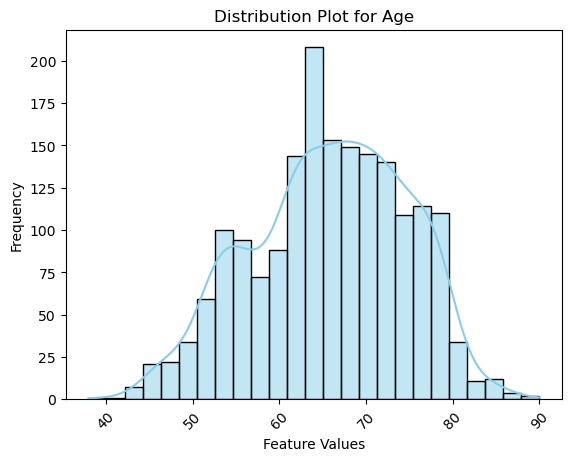

In [28]:
sns.histplot(df['age'], kde=True, color='skyblue')
plt.title('Distribution Plot for Age')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

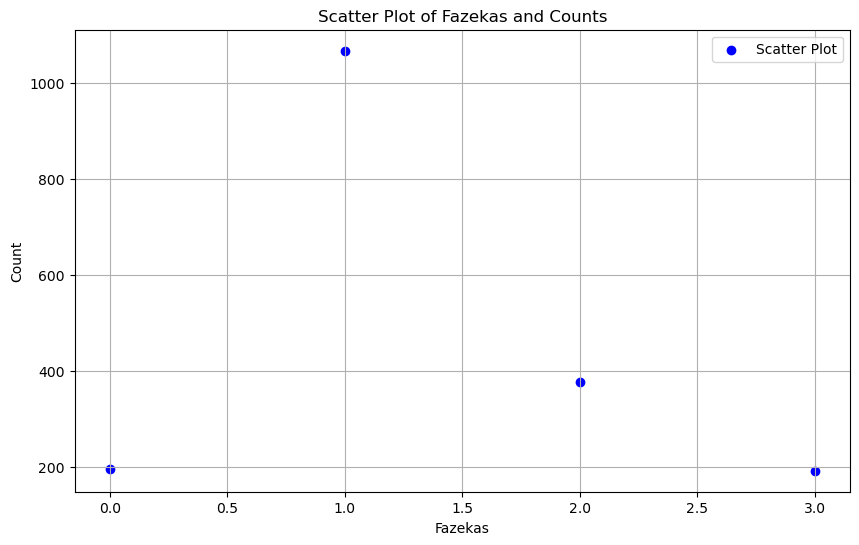

In [29]:
count_dup = df['Fazekas'].value_counts()

labels = count_dup.index
counts = count_dup.values

plt.figure(figsize=(10, 6))
plt.scatter(labels, counts, color='blue', label='Scatter Plot')
plt.xlabel('Fazekas')
plt.ylabel('Count')
plt.title('Scatter Plot of Fazekas and Counts')
plt.legend()
plt.grid()

plt.show()

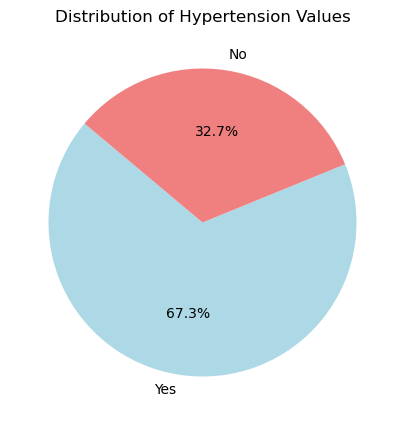

In [30]:
count_phones = df['hypertension'].value_counts()


labels = count_phones.index
sizes = count_phones.values
colors = ['lightblue', 'lightcoral', 'gold','lightgreen']

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Hypertension Values')
plt.show()

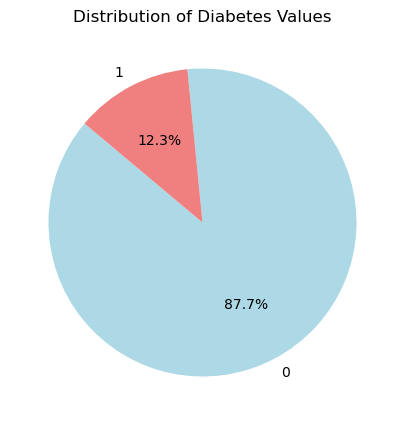

In [31]:
count_phones = df['diabetes'].value_counts()


labels = count_phones.index
sizes = count_phones.values
colors = ['lightblue', 'lightcoral', 'gold','lightgreen']

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Diabetes Values')
plt.show()

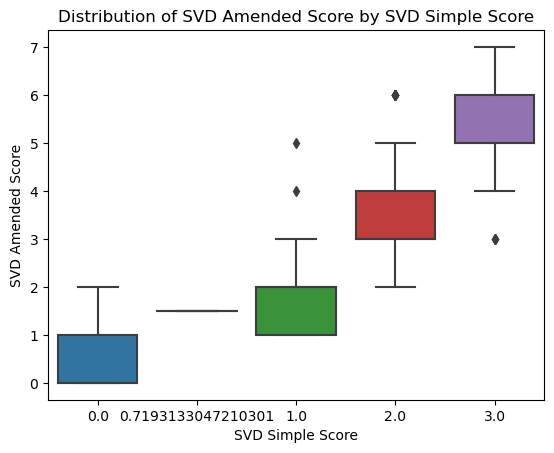

In [32]:
sns.boxplot(x='SVD Simple Score', y='SVD Amended Score', data=df)

# Add labels and title
plt.xlabel('SVD Simple Score')
plt.ylabel('SVD Amended Score')
plt.title('Distribution of SVD Amended Score by SVD Simple Score')

# Show the plot
plt.show()

In [ ]:
cat_cols = ['gender','smoking','hypertension','hypercholesterolemia','lacunes_num','study','study1']
encoder = OneHotEncoder(drop = 'first', sparse = False)
encoded_cols = pd.DataFrame(encoder.fit_transform(df[cat_cols]), columns = encoder.get_feature_names_out(cat_cols))

In [ ]:
num_cols = ['ID','age','dementia','EF','PS','Global','diabetes',
       'fazekas_cat','SVD Simple Score','SVD Amended Score','Fazekas','lac_count','CMB_count']
encoder1 = StandardScaler()
standard_cols = pd.DataFrame(encoder1.fit_transform(df[num_cols]), columns = encoder1.get_feature_names_out(num_cols))

In [ ]:
x = pd.concat([encoded_cols,standard_cols], axis = 1)
y = df['dementia']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 42)

In [ ]:
x_train

In [ ]:
x_test

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
sc = StandardScaler()

In [ ]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
svcm = SVC(kernel = 'sigmoid')

In [ ]:
svcm.fit(x_train, y_train)

In [ ]:
y_pred = svcm.predict(x_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy Score : {:.2f}%'.format(acc * 100))

In [ ]:
print('', metrics.classification_report(y_test, y_pred))

In [ ]:
print('',metrics.confusion_matrix(y_test,y_pred))

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="flare", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC Score:", auc_roc)

precision, recall, _ = precision_recall_curve(y_test, y_pred)
auc_prc = auc(recall, precision)
print("AUC-PRC Score:", auc_prc)

In [ ]:
y_pred_proba = knn_model.predict_proba(x_test)

y_scores = y_pred_proba[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_test, y_scores)
prc_auc = auc(recall, precision)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC-ROC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label=f'AUC-PRC = {prc_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()